# **PREPROCCESSING**

### **Exploring Dataset**

In [47]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import string
import re
from wordcloud.wordcloud import WordCloud


In [34]:
df = pd.read_csv("../data/sentiment_data.csv")

df.head()

,text,emotion
0,i should have been at the pub instead of which...,sadness
1,ill just have to make some local friends i can...,anger
2,i didnt feel so hot,love
3,i would further suggest people might feel more...,love
4,i am feeling irritable cranky often,anger


In [35]:
df.emotion.unique()

array(['sadness', 'anger', 'love', 'fear', 'joy', 'surprise'],
      dtype=object)

In [36]:
df.emotion.value_counts()

emotion
sadness     572
anger       572
love        572
fear        572
joy         572
surprise    572
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2b7518ae780>,
 [Text(0.9526279355804298, 0.5500000148652441, 'sadness'),
  Text(-5.149471629032507e-08, 1.0999999999999988, 'anger'),
  Text(-0.9526279870751434, 0.5499999256737774, 'love'),
  Text(-0.952627884085708, -0.5500001040567056, 'fear'),
  Text(1.5448414935947287e-07, -1.0999999999999892, 'joy'),
  Text(0.9526280385698485, -0.5499998364823061, 'surprise')])

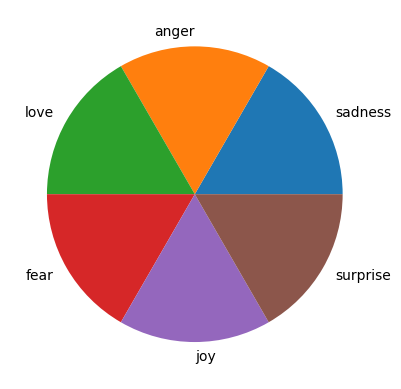

In [37]:
plt.pie(df.emotion.value_counts().values, labels=df.emotion.value_counts().keys())

### **Cleaning**

**Duplicated Data**

In [38]:
df[df.duplicated]

,text,emotion


**Missing Value**

In [39]:
df.isna().sum()

text       0
emotion    0
dtype: int64

### **Case Folding**

In [42]:
def case_folding(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'\n+', '', text)
    text = re.sub(r'\r+', '', text)
    text = re.sub(r'\d+', '', text)

    text = text.translate(str.maketrans("", "", string.punctuation))

    emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"
                            u"\U0001F300-\U0001F5FF"
                            u"\U0001F680-\U0001F6FF"
                            u"\U00010000-\U0010ffff"
                            "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r"", text)

    return text.lower()


df.text = df.text.apply(case_folding)
df.text.head()

0    i should have been at the pub instead of which...
1    ill just have to make some local friends i can...
2                                  i didnt feel so hot
3    i would further suggest people might feel more...
4                  i am feeling irritable cranky often
Name: text, dtype: object

### **Tokenize**

In [44]:
def tokenize(text):
    return word_tokenize(text)

df.text = df.text.apply(tokenize)
df.text.head()

0    [i, should, have, been, at, the, pub, instead,...
1    [ill, just, have, to, make, some, local, frien...
2                            [i, didnt, feel, so, hot]
3    [i, would, further, suggest, people, might, fe...
4           [i, am, feeling, irritable, cranky, often]
Name: text, dtype: object

### **Stopwords**

In [52]:
stopw = stopwords.words('English')
def stopwod_func(text):
    return [word for word in text if word not in stopw]

df.text = df.text.apply(stopwod_func)
df.text.head()

0    [pub, instead, stayed, home, feeling, morose, ...
1    [ill, make, local, friends, go, movies, know, ...
2                                   [didnt, feel, hot]
3    [would, suggest, people, might, feel, ease, ca...
4                  [feeling, irritable, cranky, often]
Name: text, dtype: object

### **Stemming**

In [53]:
stemmer = PorterStemmer()
def stemming_func(text):
    return [stemmer.stem(word) for word in text]

df.text.apply(stemming_func)

0        [pub, instead, stay, home, feel, moros, depress]
1       [ill, make, local, friend, go, movi, know, fac...
2                                      [didnt, feel, hot]
3       [would, suggest, peopl, might, feel, eas, care...
4                            [feel, irrit, cranki, often]
                              ...                        
3427                       [feel, bless, abl, see, anyth]
3428    [think, anoth, reason, love, concert, set, fee...
3429         [usual, take, protein, start, feel, letharg]
3430    [feel, rich, peopl, never, understand, cruelti...
3431    [feel, slightli, naughti, hold, cd, see, doesn...
Name: text, Length: 3432, dtype: object

### **Analyze Frequency Words**

In [54]:
df.emotion.unique()

array(['sadness', 'anger', 'love', 'fear', 'joy', 'surprise'],
      dtype=object)

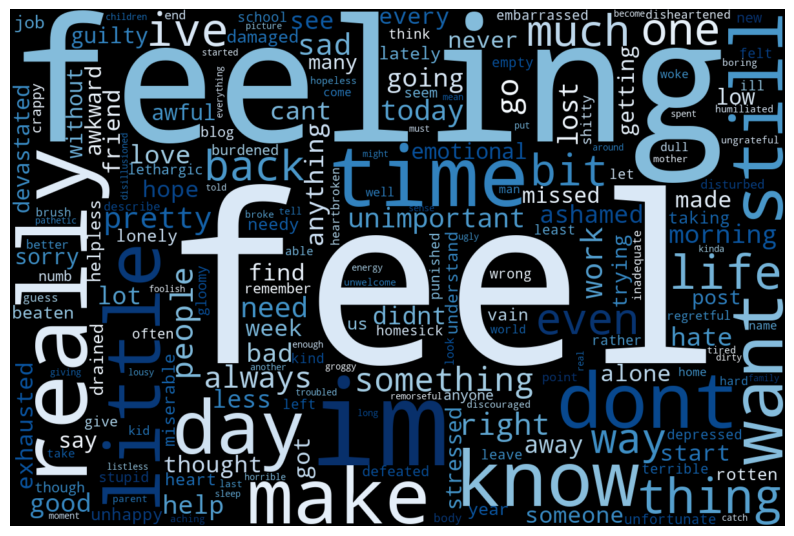

In [55]:

def show_wordcloud(wc):
    plt.figure(figsize=(10, 8)) 
    plt.axis("off") 
    plt.imshow(wc, interpolation="bilinear")
    plt.show()


all_words = "".join([str(text).replace("'", "") for text in df.text[df.emotion == "sadness"]])


word_cloud = WordCloud(
    width=1200, 
    height=800,
    random_state=123, 
    colormap="Blues_r",
    collocations=False
).generate(all_words)

show_wordcloud(word_cloud)

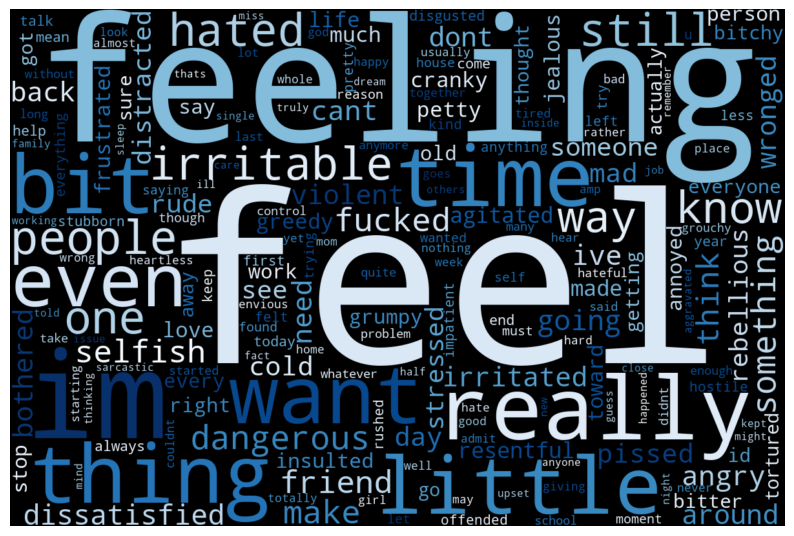

In [56]:

def show_wordcloud(wc):
    plt.figure(figsize=(10, 8)) 
    plt.axis("off") 
    plt.imshow(wc, interpolation="bilinear")
    plt.show()


all_words = "".join([str(text).replace("'", "") for text in df.text[df.emotion == "anger"]])


word_cloud = WordCloud(
    width=1200, 
    height=800,
    random_state=123, 
    colormap="Blues_r",
    collocations=False
).generate(all_words)

show_wordcloud(word_cloud)

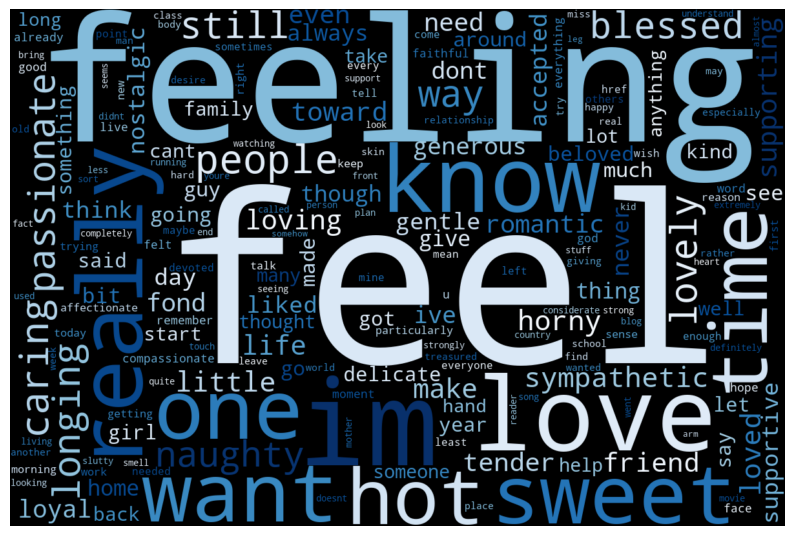

In [57]:

def show_wordcloud(wc):
    plt.figure(figsize=(10, 8)) 
    plt.axis("off") 
    plt.imshow(wc, interpolation="bilinear")
    plt.show()


all_words = "".join([str(text).replace("'", "") for text in df.text[df.emotion == "love"]])


word_cloud = WordCloud(
    width=1200, 
    height=800,
    random_state=123, 
    colormap="Blues_r",
    collocations=False
).generate(all_words)

show_wordcloud(word_cloud)

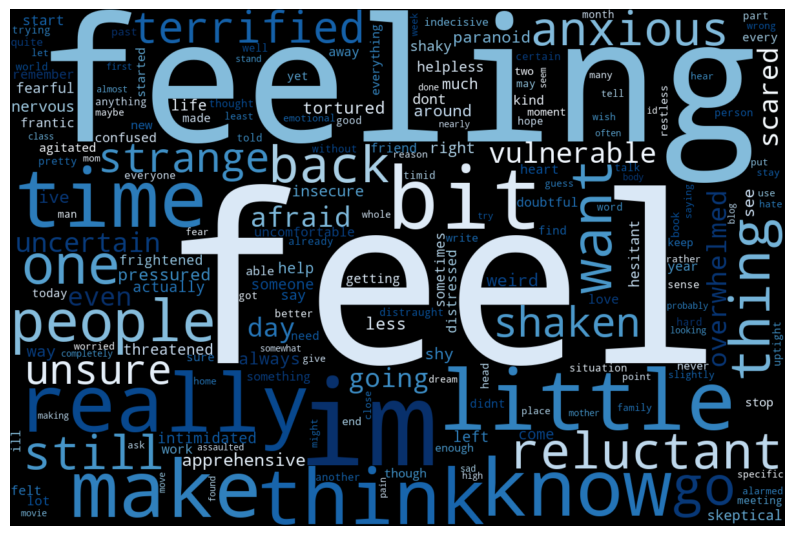

In [58]:

def show_wordcloud(wc):
    plt.figure(figsize=(10, 8)) 
    plt.axis("off") 
    plt.imshow(wc, interpolation="bilinear")
    plt.show()


all_words = "".join([str(text).replace("'", "") for text in df.text[df.emotion == "fear"]])


word_cloud = WordCloud(
    width=1200, 
    height=800,
    random_state=123, 
    colormap="Blues_r",
    collocations=False
).generate(all_words)

show_wordcloud(word_cloud)

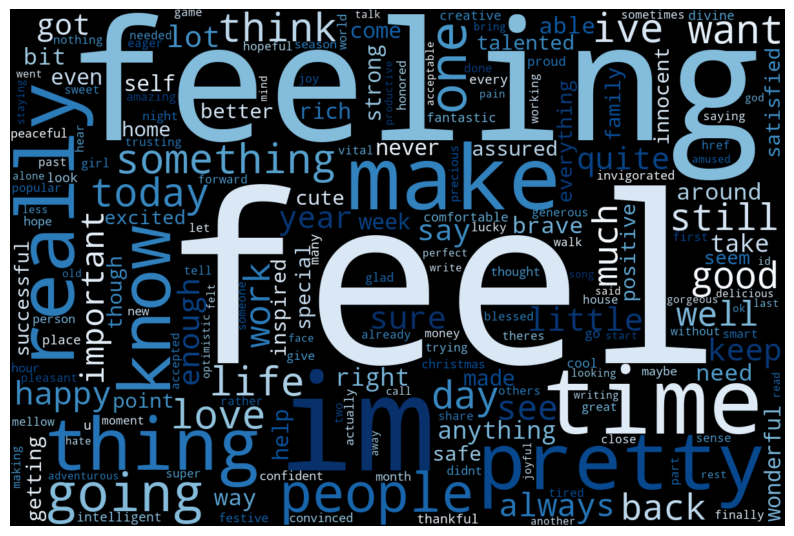

In [59]:

def show_wordcloud(wc):
    plt.figure(figsize=(10, 8)) 
    plt.axis("off") 
    plt.imshow(wc, interpolation="bilinear")
    plt.show()


all_words = "".join([str(text).replace("'", "") for text in df.text[df.emotion == "joy"]])


word_cloud = WordCloud(
    width=1200, 
    height=800,
    random_state=123, 
    colormap="Blues_r",
    collocations=False
).generate(all_words)

show_wordcloud(word_cloud)

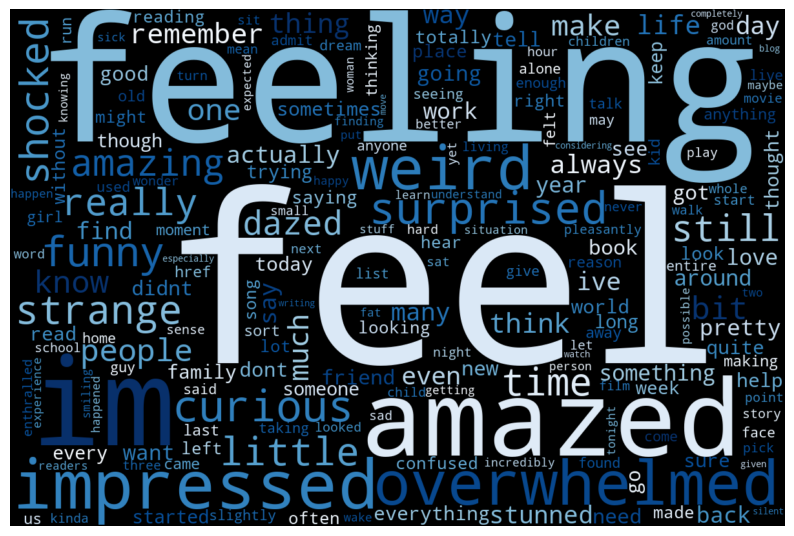

In [60]:

def show_wordcloud(wc):
    plt.figure(figsize=(10, 8)) 
    plt.axis("off") 
    plt.imshow(wc, interpolation="bilinear")
    plt.show()


all_words = "".join([str(text).replace("'", "") for text in df.text[df.emotion == "surprise"]])


word_cloud = WordCloud(
    width=1200, 
    height=800,
    random_state=123, 
    colormap="Blues_r",
    collocations=False
).generate(all_words)

show_wordcloud(word_cloud)

# **TF IDF**

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=.90, # drop word that appear at 90% document 
    min_df=2) # drop word that appear less than 2 document

_text = df.text.apply(lambda x: " ".join(x))
tfidf_matrix = vectorizer.fit_transform(_text)
features = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=features)

tfidf_df

,abandon,ability,able,absolutely,abused,accept,acceptable,acceptance,accepted,accessories,...,yoga,york,youd,young,younger,youre,youth,youve,zealand,zone
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,0.0,0.0,0.525067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3428,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3429,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3430,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **MODELING**

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV

### **Train Test Split**

In [64]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df.emotion, random_state=42, test_size=0.3)

X_train

,abandon,ability,able,absolutely,abused,accept,acceptable,acceptance,accepted,accessories,...,yoga,york,youd,young,younger,youre,youth,youve,zealand,zone
1427,0.0,0.252749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3350,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1689,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2110,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2892,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1130,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1294,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
860,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


### **Training**

In [65]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)

KNeighborsClassifier()

### **Testing and Evaluation**

In [69]:
y_predict = model.predict(X_test)

accuracy_score(y_test, y_predict)

0.654368932038835

In [85]:
logistic_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm_classifier = SVC()
knn = KNeighborsClassifier()
naive_bayes = BernoulliNB()

logistic_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)


BernoulliNB()

Text(0.5, 1.0, 'Accuracy Comparison of Different Models')

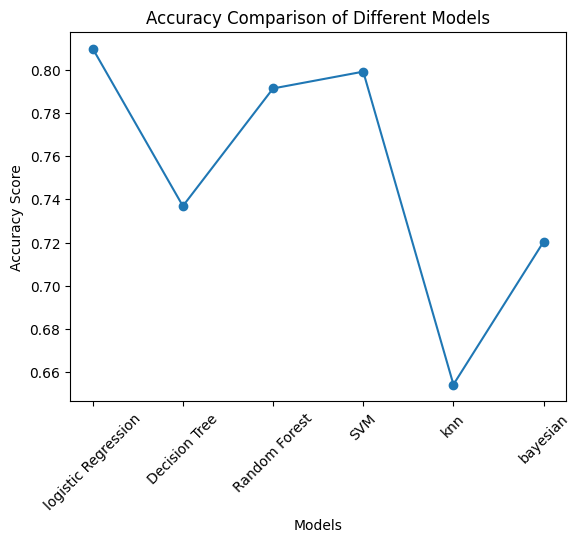

In [88]:
logistic_reg_pred = logistic_reg.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
svm_classifier_pred = svm_classifier.predict(X_test)
knn_pred = knn.predict(X_test)
naive_bayes_pred = naive_bayes.predict(X_test)
accuracy_models = {"logistic Regression":accuracy_score(y_test,logistic_reg_pred), 
                   "Decision Tree":accuracy_score(y_test,decision_tree_pred),
                   "Random Forest":accuracy_score(y_test,random_forest_pred),
                   "SVM":accuracy_score(y_test,svm_classifier_pred),
                   "knn":accuracy_score(y_test,knn_pred),
                   "bayesian":accuracy_score(y_test,naive_bayes_pred)}

plt.plot(list(accuracy_models.keys()), list(accuracy_models.values()), marker='o')

plt.xticks(rotation=45)  
plt.ylabel("Accuracy Score")
plt.xlabel("Models")
plt.title("Accuracy Comparison of Different Models")

In [102]:
logreg = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2', 'l1'],  # Regularization types
    'solver': ['liblinear', 'saga']  # Solvers that work with l1 or l2 penalties
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best Logistic Regression model:", accuracy)


d:\Python\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Python\Lib\site-packages\

Best hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy of the best Logistic Regression model: 0.8728155339805825


d:\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [103]:
model = LogisticRegression(C=10, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(C=10, penalty='l1', solver='liblinear')

              precision    recall  f1-score   support

     sadness       0.88      0.86      0.87       160
       anger       0.82      0.85      0.84       166
        love       0.83      0.85      0.84       185
        fear       0.93      0.95      0.94       157
         joy       0.87      0.80      0.84       174
    surprise       0.92      0.93      0.92       188

    accuracy                           0.87      1030
   macro avg       0.87      0.87      0.87      1030
weighted avg       0.87      0.87      0.87      1030



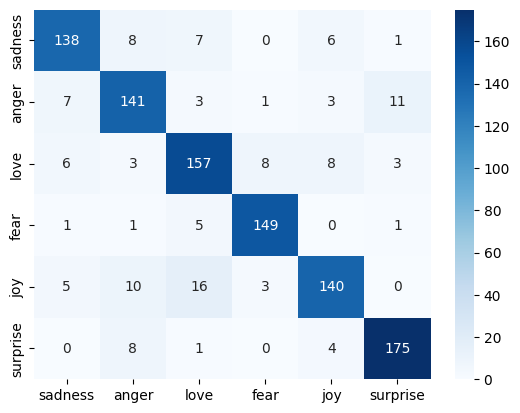

In [104]:
y_predict = model.predict(X_test)

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, cmap="Blues", annot=True, xticklabels=df.emotion.unique(), yticklabels=df.emotion.unique(),fmt=".0f")
print(classification_report(y_test, y_predict, target_names=df.emotion.unique()))

In [117]:
class Preprocessing:
    def __init__(self, vectorizer):
        self.vectorizer = vectorizer

    def case_folding(self, text):
        text = re.sub(r'@[A-Za-z0-9_]+', '', text)
        text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
        text = re.sub(r'#\w+', '', text)
        text = re.sub(r'https?://\S+', '', text)
        text = re.sub(r'\n+', '', text)
        text = re.sub(r'\r+', '', text)
        text = re.sub(r'\d+', '', text)
        text = text.translate(str.maketrans("", "", string.punctuation))

        emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"
                                   u"\U0001F300-\U0001F5FF"
                                   u"\U0001F680-\U0001F6FF"
                                   u"\U00010000-\U0010ffff"
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r"", text)

        return text.lower()

    def tokenize(self, text):
        return word_tokenize(text)

    def stopword(self, text):
        stopw = stopwords.words("english")
        return [word for word in text if word not in stopw]

    def stemming(self, text):
        stemmer = PorterStemmer()
        return [stemmer.stem(word) for word in text]

    def preprocess_input(self, text):
        text = self.case_folding(text)
        tokens = self.tokenize(text)
        tokens = self.stopword(tokens)
        tokens = self.stemming(tokens)
        return " ".join(tokens)  # Join back to string format

    def transform_to_tfidf(self, input_text):
        # Preprocess the input
        preprocessed_text = self.preprocess_input(input_text)
        # Transform using the saved TF-IDF vectorizer
        tfidf_vector = self.vectorizer.transform([preprocessed_text])  # Transform as list of texts
        return tfidf_vector
    

In [120]:
new_df = pd.read_csv("../data/sentiment_data.csv")

new_df.head()

,text,emotion
0,i should have been at the pub instead of which...,sadness
1,ill just have to make some local friends i can...,anger
2,i didnt feel so hot,love
3,i would further suggest people might feel more...,love
4,i am feeling irritable cranky often,anger


In [126]:
predict_index = 435
preprocessing = Preprocessing(vectorizer)
X_vector = preprocessing.transform_to_tfidf(new_df.iloc[predict_index].text)
new_df.iloc[predict_index].text, model.predict(X_vector)[0], new_df.iloc[predict_index].emotion

('i feel hesitant and uncertain sometimes', 'fear', 'fear')

In [128]:
predict_index = 230
preprocessing = Preprocessing(vectorizer)
X_vector = preprocessing.transform_to_tfidf(new_df.iloc[predict_index].text)
new_df.iloc[predict_index].text, model.predict(X_vector)[0], new_df.iloc[predict_index].emotion

('i feel comfortable enough doing presentations in front of professors and students i am a performer so its somewhat like the same thing most of my experiences back in grade school were hard when it came to presenting because i wasnt into it or got made fun of',
 'joy',
 'joy')

In [140]:
predict_index = 547
preprocessing = Preprocessing(vectorizer)
X_vector = preprocessing.transform_to_tfidf(new_df.iloc[predict_index].text)
new_df.iloc[predict_index].text, model.predict(X_vector)[0], new_df.iloc[predict_index].emotion

('i would feel weird having my dads hand on my stomach for any amount of time especially for several minutes while he waits to feel taryn jumping around in there',
 'surprise',
 'surprise')

### **Conclusion**

In [141]:
predict_index = 234
preprocessing = Preprocessing(vectorizer)
X_vector = preprocessing.transform_to_tfidf(new_df.iloc[predict_index].text)
new_df.iloc[predict_index].text, model.predict(X_vector)[0], new_df.iloc[predict_index].emotion

('i wish it was a more comforting feeling but instead it feels strange like living the memories of someone else or maybe having woken up from a long dream or a long sleep years and finding that the trees around you have grown taller',
 'fear',
 'surprise')

In [142]:
import pickle

with open('../models/sentiment_model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('../models/preproccessing.pkl', 'wb') as file:
    pickle.dump(preprocessing, file)
with open('../models/vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


best model : Logistic Regression -> {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}